Software Defect Prediction using RNN

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
up=files.upload()

Saving jm1_csv.csv to jm1_csv.csv


In [ ]:
df = pd.read_csv('jm1_csv.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [ ]:
df.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,GLOBAL_DATA_COMPLEXITY,GLOBAL_DATA_DENSITY,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c
0,0,1,0,0,0,0,1,1.00,0,1,1,1,1,0,0,0,1,1,7.74,1.50,17.41,0.00,5,0.67,0.97,11.61,1,0,0,2,0.50,2,3,2,3,2,0.00,0,False
1,0,1,0,0,0,0,1,1.00,0,1,1,1,1,0,0,0,0,0,7.74,1.50,17.41,0.00,5,0.67,0.97,11.61,1,0,0,2,1.00,2,3,2,3,1,0.00,0,False
2,0,1,1,0,0,0,1,1.00,0,1,1,2,1,0,0,0,0,0,9.51,3.00,85.59,0.01,9,0.33,4.75,28.53,1,0,0,3,0.50,3,6,3,6,2,0.00,0,False
3,8,17,11,32,3,12,13,0.16,6,10,0,43,4,0,48,0,10,0,49.82,25.34,31983.69,0.42,212,0.04,1776.87,1262.29,0,3,6,32,0.14,75,137,37,25,93,42.17,80,False
4,4,7,1,1,8,12,4,0.17,6,1,0,20,1,0,23,0,4,1,25.56,20.00,10223.25,0.17,113,0.05,567.96,511.16,0,3,6,18,0.11,52,61,13,10,38,28.13,24,False


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LOC_BLANK,9466.0,1.556835,4.577765,0.0,0.00,0.00,1.0000,87.00
BRANCH_COUNT,9466.0,2.954046,7.763753,1.0,1.00,1.00,3.0000,351.00
CALL_PAIRS,9466.0,1.287133,2.590355,0.0,0.00,0.00,1.0000,72.00
LOC_CODE_AND_COMMENT,9466.0,0.784281,3.650174,0.0,0.00,0.00,0.0000,98.00
LOC_COMMENTS,9466.0,1.612719,7.256949,0.0,0.00,0.00,0.0000,117.00
CONDITION_COUNT,9466.0,3.315233,12.886130,0.0,0.00,0.00,4.0000,630.00
CYCLOMATIC_COMPLEXITY,9466.0,1.924150,3.997827,1.0,1.00,1.00,2.0000,192.00
CYCLOMATIC_DENSITY,9466.0,0.670175,0.364584,0.0,0.29,1.00,1.0000,1.00
DECISION_COUNT,9466.0,1.571308,6.229086,0.0,0.00,0.00,2.0000,312.00
DESIGN_COMPLEXITY,9466.0,1.588633,3.354746,1.0,1.00,1.00,1.0000,186.00


## Train Test Split

In [ ]:
df['status'] = df['defects'].map({True:1,False:0})

In [ ]:

y=df['status'].values
X=df.drop('defects',axis=1).iloc[:,:-15].values

In [ ]:
y

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
"""
df=df.drop('problems',axis=1)
#.iloc[:,:-10]
X = df.drop('status',axis=1).values
y = df['status'].values
"""

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=101)

In [ ]:
X_train.shape

(9252, 7)


## Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model
                  
    

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,BatchNormalization
from keras.layers.recurrent import LSTM
from keras.regularizers import l2

In [ ]:
X_train = X_train.reshape(len(X_train), 1, X_train.shape[1])
X_test = X_test.reshape(len(X_test), 1, X_test.shape[1])

In [ ]:
X_train.shape

(8046, 1, 24)

In [ ]:
model = Sequential()

model.add(LSTM(128,
    return_sequences=True,input_shape=(X_train.shape[1:])))
model.add(Dropout(0.2))
model.add(LSTM(
    64,
    return_sequences=False,input_shape=(X_train.shape[1:])))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units=1,activation='sigmoid',input_shape=(X_train.shape[1:])))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 128)            78336     
                                                                 
 dropout_20 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 batch_normalization_10 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                      

## Training the Model 

### Early Stopping 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=7)

In [ ]:


model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/100
290/290 [==============================] - 9s 12ms/step - loss: 0.7833 - accuracy: 0.7849 - val_loss: 0.5572 - val_accuracy: 0.7961
Epoch 2/100
290/290 [==============================] - 3s 10ms/step - loss: 0.4796 - accuracy: 0.8084 - val_loss: 0.4957 - val_accuracy: 0.7967
Epoch 3/100
290/290 [==============================] - 3s 10ms/step - loss: 0.4638 - accuracy: 0.8109 - val_loss: 0.4699 - val_accuracy: 0.7973
Epoch 4/100
290/290 [==============================] - 3s 10ms/step - loss: 0.4590 - accuracy: 0.8115 - val_loss: 0.4872 - val_accuracy: 0.7985
Epoch 5/100
290/290 [==============================] - 3s 10ms/step - loss: 0.4572 - accuracy: 0.8101 - val_loss: 0.4626 - val_accuracy: 0.7985
Epoch 6/100
290/290 [==============================] - 3s 10ms/step - loss: 0.4556 - accuracy: 0.8128 - val_loss: 0.4592 - val_accuracy: 0.8010
Epoch 7/100
290/290 [==============================] - 3s 10ms/step - loss: 0.4561 - accuracy: 0.8107 - val_loss: 0.4738 - val_accuracy:

In [ ]:
model_loss = pd.DataFrame(model.history.history)

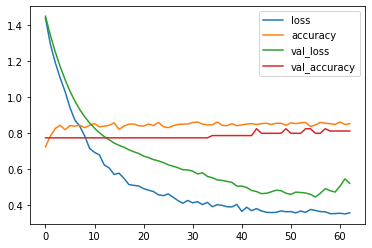

In [ ]:
model_loss.plot()

# Model Evaluation

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
y_test

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        61
           1       0.67      0.33      0.44        18

    accuracy                           0.81        79
   macro avg       0.75      0.64      0.66        79
weighted avg       0.79      0.81      0.79        79



In [ ]:
print('ACCURACY:',metrics.accuracy_score(y_test,predictions))

ACCURACY: 0.9908450704225352


In [ ]:
print('PRECISION:', metrics.precision_score(y_test,predictions))

PRECISION: 1.0


In [ ]:
print('RECALL:', metrics.recall_score(y_test,predictions))

RECALL: 0.07142857142857142


In [ ]:
print('F1-SCORE:', metrics.f1_score(y_test,predictions))

F1-SCORE: 0.13333333333333333


In [ ]:
print('AUC ROC SCORE:',metrics.roc_auc_score(y_test,predictions))

AUC ROC SCORE: 0.5357142857142857


In [ ]:
print('MAE VALUE:',(metrics.mean_absolute_error(y_test,predictions)))

MSE VALUE: 0.20146968769136558


In [ ]:
print('RMSE VALUE:',(metrics.mean_squared_error(y_test,predictions)))

RMSE VALUE: 0.20146968769136558
